# Loading dataset

In [1]:
import pandas as pd
df = pd.read_csv('emotions.csv', sep = ',')
display(df)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


# Preprocessing

In [2]:
texts = df['text']
labels = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Data Splitting for training

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Model

In [5]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC()
svm_linear.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

# Evaluation

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     24238
           1       0.91      0.93      0.92     28214
           2       0.79      0.78      0.78      6911
           3       0.90      0.91      0.90     11463
           4       0.85      0.84      0.85      9542
           5       0.73      0.72      0.72      2994

    accuracy                           0.89     83362
   macro avg       0.85      0.85      0.85     83362
weighted avg       0.89      0.89      0.89     83362



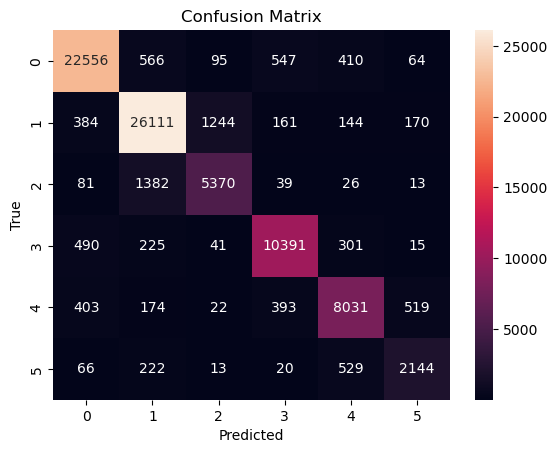

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_poly = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_poly, target_names=[str(cls) for cls in label_encoder.classes_]))


# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# New data prediction

In [7]:
def predict_emotion(vectorizer, model, label_encoder):
    sentence = input("Enter the sentence: ").strip()
    X_input = vectorizer.transform([sentence])
    y_pred = model.predict(X_input)
    predicted_emotion = label_encoder.inverse_transform(y_pred)[0]
    print("Input Sentence: ", sentence)
    print("Predicted Emotion: ", predicted_emotion)


In [8]:
predict_emotion(vectorizer= vectorizer, model= svm_linear, label_encoder= label_encoder)

Enter the sentence: how are you
Input Sentence:  how are you
Predicted Emotion:  1
